In [1]:
## Please note that each time we refresch the code, the data collected from Twitter change, hence, we uploaded the
## dataset we worked with online, as it is more relevant for November
## We used Streaming API in order go get all tweets in the given time frame
import tweepy, codecs
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.mpl_style', 'default')
import csv,io
import pandas as pd
from aylienapiclient import textapi


/Users/majabratovic/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
## Set Twitter API Account
consumer_key = 'HZ81RcQixzrSGpIhHHYP6E9rp'
consumer_secret = 'rcbG0cinYrVxJj0vnZYqFYsWU3pkX2jiHM6gYMUEPdOaFGqxAF'
access_token = '3297316273-fwEqmaTYvA6P9JEkH0kE9jI3VWSNCvyb6NTO0Pm'
access_token_secret = 'KLnBUoEmqR9BjATt13fpExWXzZZ8wb9ucy0Ty2YjO4Mu8'

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
auth.secure=True 
api=tweepy.API(auth,wait_on_rate_limit=True)

In [4]:
## Scrap the tweets on Apple Pay from 01 to 29 Nov 
results = []
for tweet in tweepy.Cursor(api.search, q='%23ApplePay OR ApplePay',since='2017-11-01', until='2017-11-29',lang='en').items():
    results.append(tweet)
## No of people tweeting on ApplePay in Nov
len(results)

316

In [36]:
## Create the dataset
def toDataFrame(tweets):

    DataSet = pd.DataFrame()
    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet 
    in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet 
    in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]
    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet 
    in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet 
    in tweets]
    DataSet['userCreateDt'] = [tweet.user.created_at for tweet 
    in tweets]
    DataSet['userFriendsCt'] = [tweet.user.friends_count for tweet 
    in tweets]
    return DataSet

DataSet = toDataFrame(results)
DataSet

,tweetID,tweetText,tweetRetweetCt,tweetSource,tweetFavoriteCt,tweetCreated,userID,userScreen,userName,userFollowerCt,userCreateDt,userFriendsCt
0,935658811561357312,Another bank and still no @Rogers Platinum Mas...,0,Tweetbot for iΟS,0,2017-11-28 23:56:59,16681719,dgreensp,Darren Greenspoon,191,2008-10-10 10:44:19,120
1,935655733562982400,"If can't beat 'em, join 'em!\n\nAfter battling...",0,Twitter Web Client,2,2017-11-28 23:44:45,3286970893,austfintech,Australian FinTech,3859,2015-07-21 23:25:07,1393
2,935646837612068864,@bdyling @peterwells @ANZ_AU @Macquarie Does M...,0,Twitter for iPhone,0,2017-11-28 23:09:24,14290405,Dazzzz,Dazzzz,193,2008-04-03 04:38:43,530
3,935646177906823168,@zorinlynx I wish everyone would just get onbo...,0,Twitter Web Client,0,2017-11-28 23:06:46,277732200,LynxWorx,LynxWorx,18,2011-04-05 22:41:24,319
4,935642538689613825,RT @madrobots: @Westpac @CommBank look funny n...,2,Twitter for iPhone,0,2017-11-28 22:52:19,242888232,JumpingJeff63,Jeff Meredith,447,2011-01-25 20:45:08,687
5,935641724399038464,I’m so used to paying everything with ApplePay...,0,Twitter for iPhone,0,2017-11-28 22:49:05,2524578018,xafloresx,A ღ,656,2014-05-26 09:21:01,496
6,935637355431583744,@Westpac falling further behind..... #applepay...,0,Twitter for iPhone,3,2017-11-28 22:31:43,237975228,smc2707,Coops,37,2011-01-14 02:24:03,73
7,935636785006305281,@CBCScott Is ApplePay available currently?,0,Hootsuite,0,2017-11-28 22:29:27,17480248,almoonir,Almoonir Dewji,571,2008-11-19 04:44:59,565
8,935635294065479680,Nenshi says he's skeptical about all transit f...,0,Twitter Web Client,1,2017-11-28 22:23:32,381174013,CBCScott,Scott Dippel,4622,2011-09-27 21:36:12,438
9,935633673705181184,.@BendigoBank customers can now shop with #App...,0,Buffer,1,2017-11-28 22:17:05,35169128,findercomau,finder.com.au,2486,2009-04-25 07:06:51,1297


In [37]:
## Make csv file
DataSet.to_csv("file_name_final.csv", sep=",")

In [38]:
## Check the top 5 tweets in the dataset
DataSet.head(2)

,tweetID,tweetText,tweetRetweetCt,tweetSource,tweetFavoriteCt,tweetCreated,userID,userScreen,userName,userFollowerCt,userCreateDt,userFriendsCt
0,935658811561357312,Another bank and still no @Rogers Platinum Mas...,0,Tweetbot for iΟS,0,2017-11-28 23:56:59,16681719,dgreensp,Darren Greenspoon,191,2008-10-10 10:44:19,120
1,935655733562982400,"If can't beat 'em, join 'em!\n\nAfter battling...",0,Twitter Web Client,2,2017-11-28 23:44:45,3286970893,austfintech,Australian FinTech,3859,2015-07-21 23:25:07,1393


In [39]:
##Check the last 2 tweets in the dataset
DataSet.tail(2)

,tweetID,tweetText,tweetRetweetCt,tweetSource,tweetFavoriteCt,tweetCreated,userID,userScreen,userName,userFollowerCt,userCreateDt,userFriendsCt
314,934935667255193600,Hey @eBay: why not just use #ApplePay? Feels l...,0,Twitter for iPhone,0,2017-11-27 00:03:27,585833890,XFitManKS,Bill Duron,385,2012-05-20 17:22:12,926
315,934935325494927361,"By the way, happy #CyberWeek! I do plan to mak...",0,Tweetbot for iΟS,1,2017-11-27 00:02:06,497067921,iBeckTech,David Becker,653,2012-02-19 15:46:54,995


In [40]:
## Check if there is 'None' in their 'userID' column
DataSet = DataSet[DataSet.userName.notnull()]
## Check how many tweets are we left with now
len(DataSet)

316

In [41]:
## Count the number of tweets per userID and get the first 10
user = DataSet['userName'].value_counts()[:10]
print(user)

David Becker           10
Dan Stiel               5
Sharon O'Dea            4
C-Store News            4
Jeff Meredith           4
Kristy Davis            3
Tyler James             2
primo4k                2
Douglas Bailey          2
Phronesis™ Partners     2
Name: userName, dtype: int64


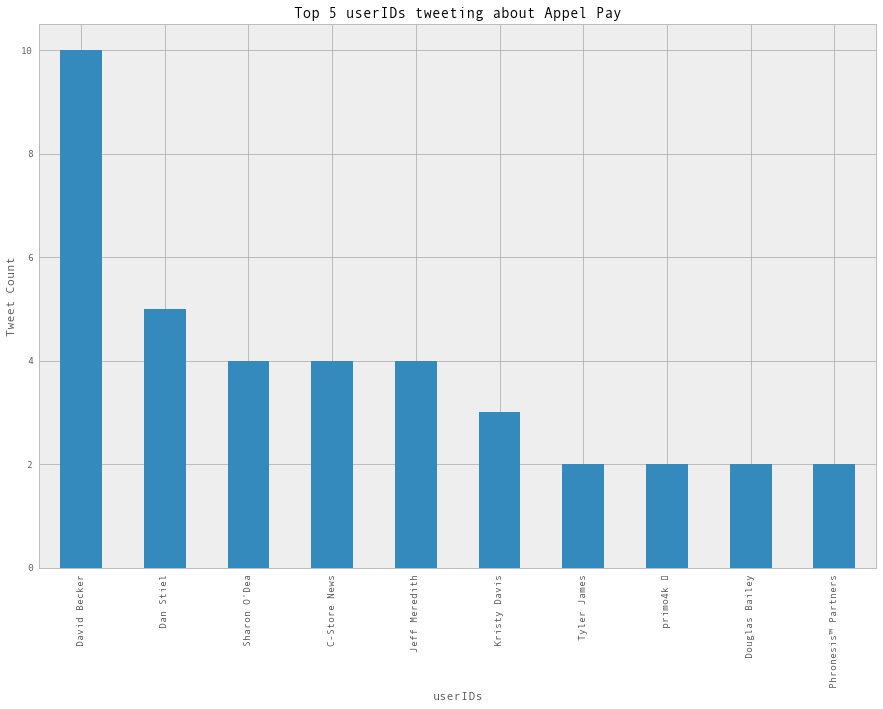

In [42]:
## Create a bar-graph figure with the top 10 user ides
plt.rcParams['figure.figsize'] = (15, 10)

user.plot(kind='bar')

## Assign labels and title to the graph to make it more presentable
plt.xlabel('userIDs')
plt.ylabel('Tweet Count')
plt.title('Top 5 userIDs tweeting about Appel Pay')

In [43]:
## Check if there is 'None' in 'tweetSource' column
DataSet = DataSet[DataSet.tweetSource.notnull()]
## Check how many tweets are we left with now
len(DataSet)

316

In [44]:
## Count the amount of sources, and display  the first 5
DataSet['tweetSource'].value_counts()[:5]



Twitter for iPhone     122
Twitter Web Client      53
Twitter for Android     24
Tweetbot for iΟS        24
IFTTT                   13
Name: tweetSource, dtype: int64

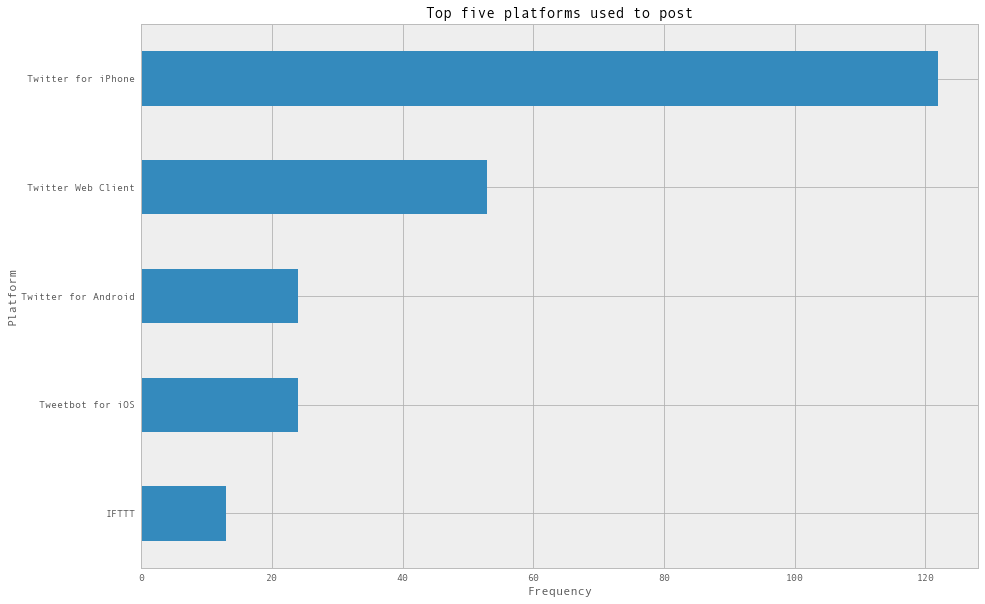

In [45]:
## Cerate a chart
DataSet['tweetSource'].value_counts().head(5).plot(kind='barh',fontsize=10).invert_yaxis()
plt.ylabel('Platform')
plt.xlabel('Frequency')
plt.title('Top five platforms used to post')

plt.show()

In [46]:
## We decides to look for the influatian bloggers by the No. of tweets saved as favorite as this indicates the possible
## impact of bloggers on public opinion
## Check if there is 'None' in 'tweetFavoriteCt' column
DataSet = DataSet[DataSet.tweetFavoriteCt.notnull()]
## Check how many tweets are we left with now
len(DataSet)

316

In [47]:
## Top 10 Bloggers
DataSet[['userName','tweetFavoriteCt']].sort_values('tweetFavoriteCt',ascending=False).head(10)

,userName,tweetFavoriteCt
189,Bendigo Bank,30
101,Belinda👜,19
204,AppleInsider,17
66,AppleInsider,16
143,Obsolete Genius,11
307,C-Store News,9
278,⏩ Guy Thompson,9
20,Adrizzy.,9
124,Tehi Palletvuori,6
298,toby knapp,6


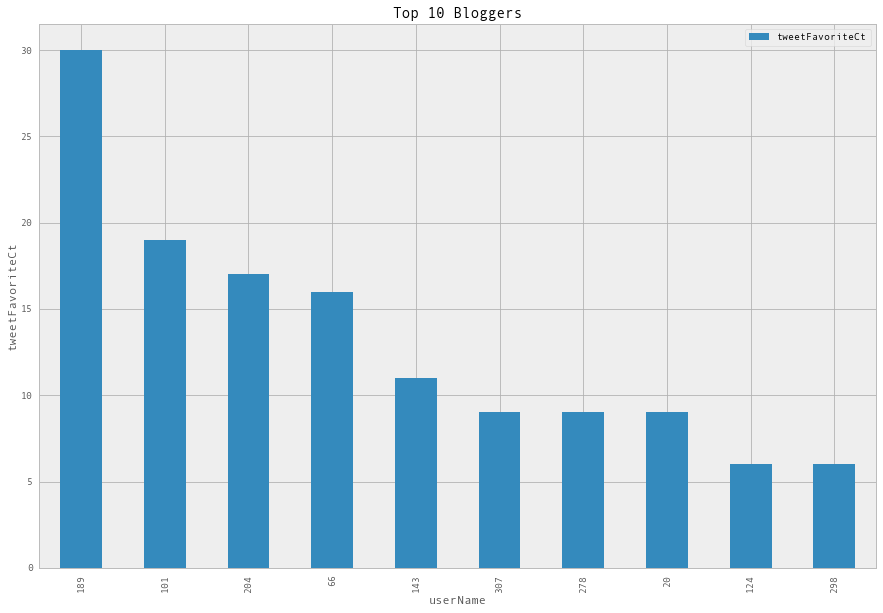

In [50]:
## Graph it
DataSet[['userName','tweetFavoriteCt']].sort_values('tweetFavoriteCt',ascending=False).head(10).plot(kind='bar')
plt.ylabel('tweetFavoriteCt')
plt.xlabel('userName')
plt.title('Top 10 Bloggers')

plt.show()

In [51]:
# Look for Retweets
DataSet[['userName','tweetRetweetCt']].sort_values('tweetRetweetCt',ascending=False).head(10)

,userName,tweetRetweetCt
291,♀VëNūS aSa BOi 웃,418
229,ian kayai njau,213
310,John Scott Hightower,139
309,W00fer,80
222,Henny P. Newton,37
144,SleazeBall McGriff,37
230,I still hate Kevin Durant,37
142,You Dont Know Nann,37
175,Ⓜ️adara,37
221,Baby B,37


In [52]:
## How many followers are there in the dataset?
sum(DataSet['userFollowerCt'])

2038035

In [53]:
## Get the No of Followers and retweets 
DataSet[['userName','userFollowerCt','tweetRetweetCt']].sort_values('tweetRetweetCt',ascending=False).head(10)

,userName,userFollowerCt,tweetRetweetCt
291,♀VëNūS aSa BOi 웃,293,418
229,ian kayai njau,1727,213
310,John Scott Hightower,8203,139
309,W00fer,435,80
222,Henny P. Newton,6313,37
144,SleazeBall McGriff,1729,37
230,I still hate Kevin Durant,1103,37
142,You Dont Know Nann,80,37
175,Ⓜ️adara,169,37
221,Baby B,1712,37


In [54]:
## Use the codecs library to write the text of the Tweets to a .txt file
file = codecs.open("AppleP.txt", "w", "utf-8")
for result in results:
    file.write(result.text)
    file.write("\n")
file.close()

In [55]:
## Now process the text mining part in Python

In [56]:
## Use the codecs library to write the text of the Tweets to a .txt file
file = codecs.open("AppleP.txt", "w", "utf-8")
for result in results:
    file.write(result.text)
    file.write("\n")
file.close()

In [57]:
## Set a new client of AYLIEN Text API (have to register as well, just as for Twitter)
client = textapi.Client("c7836ec6","d94855383bd56afe8c6842a3c8b88897")

with io.open('AppleP.csv', 'w', encoding='utf8', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(["Tweet", "Sentiment"])
    with io.open("AppleP.txt", 'r', encoding='utf8') as f:
        for tweet in f.readlines():
## Remove extra spaces or newlines around the text
            tweet = tweet.strip()

## Reject tweets which are empty so you don’t waste your API credits
            if len(tweet) == 0:
                print('skipped')
                continue
            print(tweet)

## Make call to AYLIEN Text API
            sentiment = client.Sentiment({'text': tweet})

## Write the sentiment result into csv file
            csv_writer.writerow([sentiment['text'], sentiment['polarity']])

Another bank and still no @Rogers Platinum MasterCard. It is almost 2018, are you waiting for ApplePay to be obsole… https://t.co/RaHW2APKjC
If can't beat 'em, join 'em!
skipped
After battling with @Apple earlier this year, @BendigoBank is the latest Australian i… https://t.co/z7NxGGJAHy
@bdyling @peterwells @ANZ_AU @Macquarie Does Macquarie support ApplePay? We have accounts with them, but main with… https://t.co/Wh1gn7RtXp
@zorinlynx I wish everyone would just get onboard with ApplePay, and screw cards all together.
RT @madrobots: @Westpac @CommBank look funny now without #ApplePay. All the small banks and Credit Union against you for the good of custom…
I’m so used to paying everything with ApplePay on my phone that I forgot I lost my purse!! That’s the second debit card I lost this year 🙃😭
@Westpac falling further behind..... #applepay https://t.co/qR5zExosEz
@CBCScott Is ApplePay available currently?
Nenshi says he's skeptical about all transit fare cards and costs. Points out tap

HttpError: <HttpError 429 when requesting https://api.aylien.com/api/v1/sentiment returned "">

In [58]:
## Import Counter
from collections import Counter

## open up your csv file with the sentiment results
with open('AppleP.csv', 'r', encoding = 'utf8') as csvfile:
## use Pandas to read the “Sentiment” column,
        df = pd.read_csv(csvfile)
sent = df["Sentiment"]

## use Counter to count how many times each sentiment appears
## and save each as a variable
counter = Counter(sent)
positive = counter['positive']
negative = counter['negative']
neutral = counter['neutral']

## declare the variables for the pie chart, using the Counter variables for “sizes”
labels = 'Positive', 'Negative', 'Neutral'
sizes = [positive, negative, neutral]
colors = ['green', 'red', 'grey']
yourtext = "Apple Pay"

## use matplotlib to plot the chart
plt.pie(sizes, labels = labels, colors = colors, shadow = True, startangle = 90)
plt.title("Sentiment of all tweets about Apple Pay in Nov.")
plt.show()
#check sentiment of the top 10 bloggers and compare it with the sentiment of all tweets!!!-needs to be done

In [59]:
##find the bloggers and check their sentiment analysis, and compare it with sentiment analysis of all tweets, make tables of Dataset nices and  include ratios

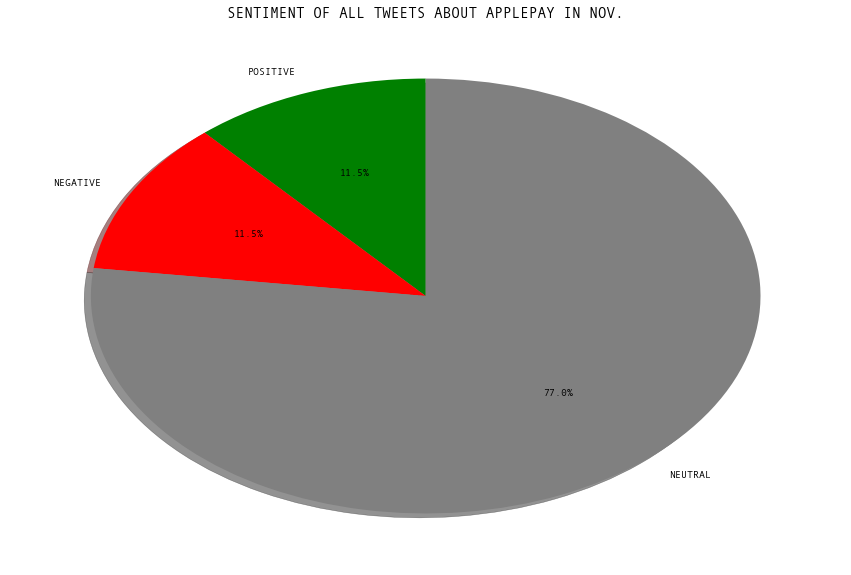

In [60]:
## Open up your csv file with the sentiment results
with open('AppleP.csv', 'r', encoding = 'utf8') as csvfile:
## use Pandas to read the “Sentiment” column,
        df = pd.read_csv(csvfile)
sent = df["Sentiment"]

## Use Counter to count how many times each sentiment appears, and save each as a variable
counter = Counter(sent)
positive = counter['positive']
negative = counter['negative']
neutral = counter['neutral']

## Declare the variables for the pie chart, using the Counter variables for “sizes”
labels = 'POSITIVE', 'NEGATIVE', 'NEUTRAL'
sizes = [positive, negative, neutral]
colors = ['green', 'red', 'grey']
yourtext = "Apple Pay"

## Use matplotlib to plot the chart
plt.pie(sizes, labels = labels,  autopct='%1.1f%%', colors = colors, shadow = True, startangle = 90)
plt.title("SENTIMENT OF ALL TWEETS ABOUT APPLEPAY IN NOV.")
plt.show()



In [61]:
## check sentiment of the top 10 bloggers and compare it with the sentiment of all tweets

In [63]:
#check sentiment of the top 10 bloggers, I checked it manually for each
from aylienapiclient import textapi
client = textapi.Client("c7836ec6", "d94855383bd56afe8c6842a3c8b88897")
sentiment = client.Sentiment({'text': 'pple Pay is now here! Using Apple Pay with your iPhone or Apple Watch is the easy, secure and private way to pay'})
print(sentiment)

{'polarity': 'neutral', 'subjectivity': 'objective', 'text': 'pple Pay is now here! Using Apple Pay with your iPhone or Apple Watch is the easy, secure and private way to pay', 'polarity_confidence': 0.6829382181167603, 'subjectivity_confidence': 0.8586202516139764}


In [64]:
## Additional data analysing performed in Excel

In [65]:
## Additional text moning performed in Ruby

In [66]:
## to install in Terminal
## pip install tweepy
## pip install -U textblob
## pip install aylien-apiclient